# Titanic: Machine Learning from Disaster

The Titanic competition is a challenge that allow competitors to illustrate the complete analysis using machine learning models and feature engineering to classify people who were likely to survive. The evaluation metric to calculate score in this competition is an "accuracy" which simply is the percentage of your correct predictions.

# Data Exploration

First of all, import all necessary packages for data exploration and visualization.

In [1]:
import pandas as pd
import numpy as np

# For data visualization
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

Import train and test data to pandas dataframes.

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

Let's take a look at train and test data.

In [3]:
# First 5 rows of Training set
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# First 5 rows of Test set
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
# Number of passenger in train and test set
print('Train shape is {}'.format(train.shape))
print('Test shape is {}'.format(test.shape))

Train shape is (891, 12)
Test shape is (418, 11)


In [6]:
# Statistical summary of training set
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# Statistical summary of test set
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [8]:
# Missing values in training set
print(train.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [9]:
# Missing values in test set
print(test.isnull().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


The titanic competition provides a dataset of passenger that contains infomation about Ticket class (pclass), Name, Sex, Age, Number of siblings/spouses aboard the Titanic (SibSp), Number of parents/children aboard the Titanic (Parch), Ticket Number, Fare, Cabin Number, Port of Embarkation (Embarked). From those information, the goal is to use data of 891 passengers in training set to predict Survival status of the other 418 passengers in test set.

According statistical summary, the mean of Survived is about 0.384 meaning that there are 38.4% of passenger survived in the training set. Furthermore, the missing values in both train and test dataset are mostly Age and Fare. There are some differences of missing values both dataset as we can see that Embarked's missing values appears only in train dataset, and the Fare missing value appears only in test dataset. This problem will be solved in the Feature Engineering part. 

In the second part, more insight will be extracted from the data set through data visualization.

# Data Visualization

This part is an analysis of relationships between Survival status of passengers and other features

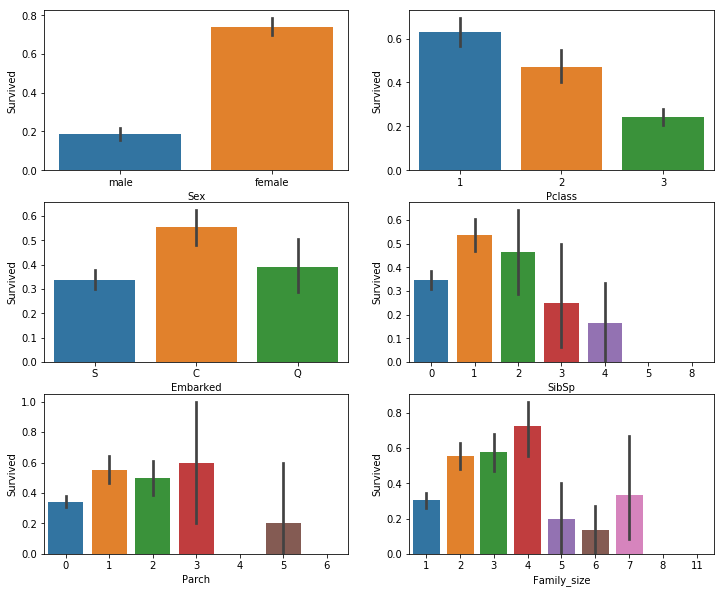

In [10]:
plt.figure(figsize=[12,10])
plt.subplot(321)
sns.barplot('Sex', 'Survived', data=train)
plt.subplot(322)
sns.barplot('Pclass', 'Survived', data=train)
plt.subplot(323)
sns.barplot('Embarked', 'Survived', data=train)
plt.subplot(324)
sns.barplot('SibSp', 'Survived', data=train)
plt.subplot(325)
sns.barplot('Parch', 'Survived', data=train)

# +1 to include the passenger themselve
train['Family_size'] = train.SibSp + train.Parch + 1 
plt.subplot(326)
sns.barplot('Family_size', 'Survived', data=train)
plt.show()

# This Feature will be re-calculate again in the feature engineering parts
train.drop('Family_size', axis=1, inplace=True)

There are some interesting insights from figures above. Female has a much better chance comparing to male since male has survival rate less than 20%. Furthermore, being first-class passenger provides a better chance of survival (nearly triple of third-class passenger chance). In addition, Passengers who embark from Queenstown port (Embarked = Q) have the best chance to survive.

In terms of family, it is always better to have some members aboard but too many of them can reduce the chance. For siblings and spouses (Sibsp), having 1 of them aboard provide the best chance of survival while the chance is gradually decrease for more number of Sibsp. In addition, having 1-3 parents and children (Parch) aboard gives a better chance of survival (more than 50% chance). However, there are some passengers who have both Sibsp and Parch so Family_size is created to captured the relationship. It is obvious that having 1-3 is the best, and the variable has an interesting pattern.

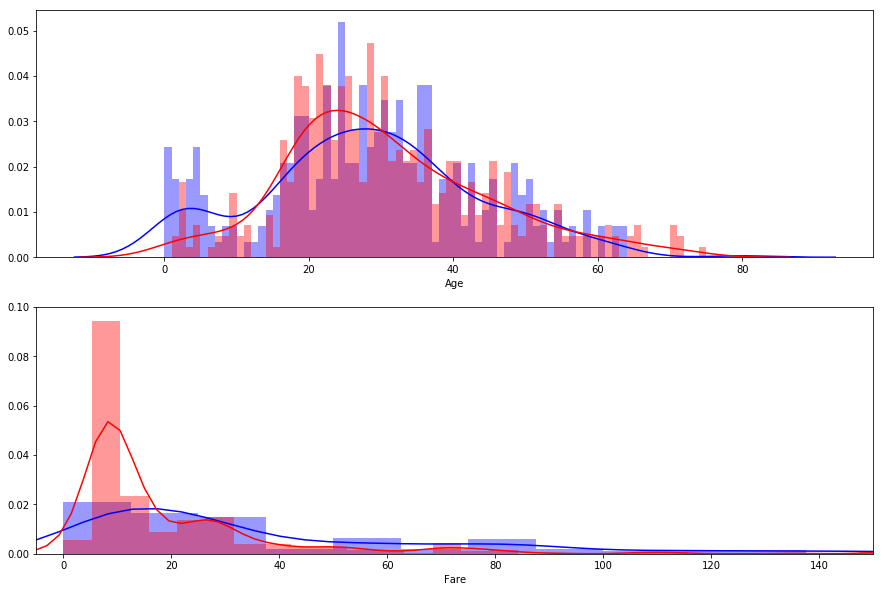

In [11]:
survive = train[train.Survived==1]
not_survive = train[train.Survived==0]

plt.figure(figsize=[15,10])

plt.subplot(211)
sns.distplot(survive['Age'].dropna().values, bins=range(0, 80, 1), color='b')
sns.distplot(not_survive['Age'].dropna().values, bins=range(0, 80, 1), color='r', axlabel='Age')


plt.subplot(212)
sns.distplot(survive['Fare'].dropna().values, color='b')
sns.distplot(not_survive['Fare'].dropna().values, color='r', axlabel='Fare')
plt.ylim((0, 0.10))
plt.xlim((-5, 150))

plt.show()

We can see that children (less than 10 years old) have higher chances of survival. Moreover, survival chances are much lower for the cheaper fares while the more expensive fare has a slightly higher chance to survive.

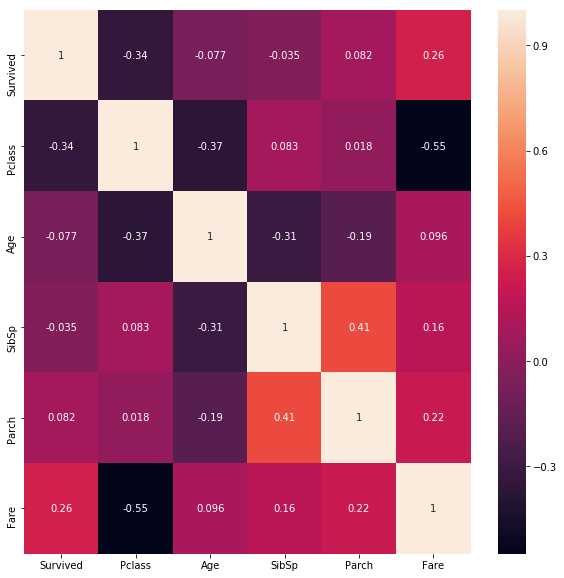

In [12]:
plt.figure(figsize=[10,10])
sns.heatmap(train.drop('PassengerId', axis=1).corr(), annot=True)
plt.show()

Let's take a look at the correlation heatmap. Pclass has a significant negative relationship with Survived opposite to Fare, which has a positive relationship. Furthermore, Pclass and Fare has a strongly negative relationship meaning that passengers need to pay higher for the lower number of class — in other words, the first-class (Pclass=1) is the most expensive class.

There are 3 features that have not been explored which are Name, Ticket, and Cabin. Thus, let's take a look at them again.

In [13]:
train[['Name', 'Ticket', 'Cabin']].head(15)

,Name,Ticket,Cabin
0,"Braund, Mr. Owen Harris",A/5 21171,NaN
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",PC 17599,C85
2,"Heikkinen, Miss. Laina",STON/O2. 3101282,NaN
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",113803,C123
4,"Allen, Mr. William Henry",373450,NaN
5,"Moran, Mr. James",330877,NaN
6,"McCarthy, Mr. Timothy J",17463,E46
7,"Palsson, Master. Gosta Leonard",349909,NaN
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",347742,NaN
9,"Nasser, Mrs. Nicholas (Adele Achem)",237736,NaN


It is interesting to see the relationship between name's title and survival rate, since it could be meaningful. Furthermore, some of Tickets and Cabin has an interesting prefix which might be useful, so let's dig a bit deeper. 

In [14]:
text_data = pd.DataFrame()
text_data['Survived'] = train.Survived
text_data['Title'] = train.Name.str.split(", ", expand=True)[1].str.split(".", expand=True)[0]
text_data['Title'] = text_data['Title'].replace(['Lady', 'the Countess','Countess','Capt', 'Col','Don', 'Dr', 'Major', 
                                                 'Rev', 'Sir', 'Jonkheer', 'Dona', 'Mme', 'Ms', 'Mlle'], 'Rare')

text_data['Ticket'] = train.Ticket.str.split(' ', expand=True).iloc[:,0]
text_data['Ticket'][text_data['Ticket'].str.isnumeric()==False] = 'Prefix'
text_data['Ticket'][text_data['Ticket'].str.isnumeric()] = 'Noprefix'

text_data['Cabin'] = pd.Series([i[0] if pd.notnull(i) else 'Unknown' for i in train['Cabin']])

In [15]:
text_data.head(15)

,Survived,Title,Ticket,Cabin
0,0,Mr,Prefix,Unknown
1,1,Mrs,Prefix,C
2,1,Miss,Prefix,Unknown
3,1,Mrs,Noprefix,C
4,0,Mr,Noprefix,Unknown
5,0,Mr,Noprefix,Unknown
6,0,Mr,Noprefix,E
7,0,Master,Noprefix,Unknown
8,1,Mrs,Noprefix,Unknown
9,1,Mrs,Noprefix,Unknown


After cleaning data, we have name's titles, a binary of ticket's prefix, and cabin prefix.

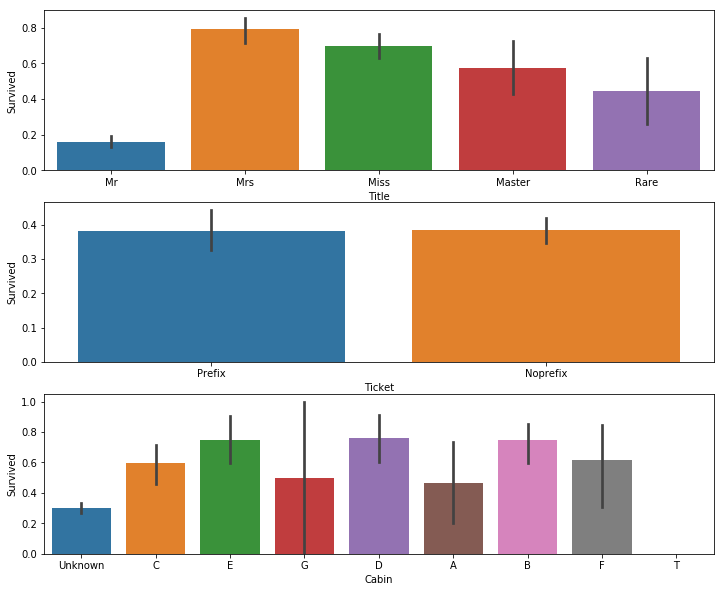

In [16]:
plt.figure(figsize=[12,10])
plt.subplot(311)
sns.barplot('Title', 'Survived', data=text_data)
plt.subplot(312)
sns.barplot('Ticket', 'Survived', data=text_data)
plt.subplot(313)
sns.barplot('Cabin', 'Survived', data=text_data)
plt.show()

Prefix of tickets does not seem to have a ralationship with Survival chance, while the other features have some interesting patterns and should be include in the model.

# Feature Engineering

First of all, let's recap all insights we found in the previous part.

Female has higher survival rate than male.
Embarked matters.
Number of Sibsp, Parch and Family_size contain interesting patterns.
Children have higher chances of survival.
Cheaper fares indicate lower survival rate.


Furthermore, Title and Cabin contain some infomations.

Starting by combine train and test data first so we can clean them easily.

In [17]:
combined = pd.concat([train.drop('Survived', axis=1), test], axis=0)

Create new features according to insights from the previous part.

In [18]:
combined['Family_size'] = combined.SibSp + combined.Parch + 1

combined['Alone'] = (combined['Family_size'] == 1).astype('int')
combined['Family_small'] = ((combined['Family_size'] > 1) & (combined['Family_size'] <= 4)).astype('int')
combined['Family_large'] = (combined['Family_size'] > 4).astype('int')
combined['Children'] = (combined['Age']<=10).astype('int')

combined['Title'] = combined['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]
combined['Title'] = combined['Title'].replace(['Lady', 'the Countess','Countess','Capt', 'Col','Don', 'Dr', 'Major', 
                                                 'Rev', 'Sir', 'Jonkheer', 'Dona', 'Mme', 'Ms', 'Mlle'], 'Rare')

combined['Cabin'] = pd.Series([i[0] if pd.notnull(i) else 'Unknown' for i in combined['Cabin']])

Drop useless features

In [19]:
combined.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

In [20]:
combined.head(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Family_size,Alone,Family_small,Family_large,Children,Title
0,3,male,22.0,1,0,7.2500,Unknown,S,2,0,1,0,0,Mr
1,1,female,38.0,1,0,71.2833,C,C,2,0,1,0,0,Mrs
2,3,female,26.0,0,0,7.9250,Unknown,S,1,1,0,0,0,Miss
3,1,female,35.0,1,0,53.1000,C,S,2,0,1,0,0,Mrs
4,3,male,35.0,0,0,8.0500,Unknown,S,1,1,0,0,0,Mr
5,3,male,NaN,0,0,8.4583,Unknown,Q,1,1,0,0,0,Mr
6,1,male,54.0,0,0,51.8625,E,S,1,1,0,0,0,Mr
7,3,male,2.0,3,1,21.0750,Unknown,S,5,0,0,1,1,Master
8,3,female,27.0,0,2,11.1333,Unknown,S,3,0,1,0,0,Mrs
9,2,female,14.0,1,0,30.0708,Unknown,C,2,0,1,0,0,Mrs


We still need to fill missing values in Age and Fare. Since Fare has only 1 missing value, it can be easily filled with median. For Age, I decide to fill missing values by median age of the people in the same Pclass because Pclass has the strongest correlation with Age.

In [21]:
combined['Fare'][combined['Fare'].isnull()] = combined['Fare'].median()
combined[combined.Pclass==1] = combined[combined.Pclass==1].fillna(combined[combined.Pclass==1].median())
combined[combined.Pclass==2] = combined[combined.Pclass==2].fillna(combined[combined.Pclass==2].median())
combined[combined.Pclass==3] = combined[combined.Pclass==3].fillna(combined[combined.Pclass==3].median())

Convert all categorial features into dummies

In [22]:
for cat_columns in ['Sex', 'Cabin', 'Embarked', 'Title']:
    combined = pd.get_dummies(combined, prefix=cat_columns, columns=[cat_columns])

In [23]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 29 columns):
Pclass           1309 non-null int64
Age              1309 non-null float64
SibSp            1309 non-null int64
Parch            1309 non-null int64
Fare             1309 non-null float64
Family_size      1309 non-null int64
Alone            1309 non-null int32
Family_small     1309 non-null int32
Family_large     1309 non-null int32
Children         1309 non-null int32
Sex_female       1309 non-null uint8
Sex_male         1309 non-null uint8
Cabin_A          1309 non-null uint8
Cabin_B          1309 non-null uint8
Cabin_C          1309 non-null uint8
Cabin_D          1309 non-null uint8
Cabin_E          1309 non-null uint8
Cabin_F          1309 non-null uint8
Cabin_G          1309 non-null uint8
Cabin_T          1309 non-null uint8
Cabin_Unknown    1309 non-null uint8
Embarked_C       1309 non-null uint8
Embarked_Q       1309 non-null uint8
Embarked_S       1309 non-null uint8
Ti

The feature engineering processes are completed. The last step in this part is to recover train and test dataset from combined.

In [24]:
survived = train.Survived
train = combined.iloc[:len(train)]
train['Survived'] = survived
test = combined.iloc[len(train):]

# Model

To create the predictive model, 4 classifier models are selected which are Logistic Regression, Support Vector Machine, Random Forest and XGBoost.

Let's import relevant packages first.

In [25]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

Defined X, y for training and X_test for prediction.

In [26]:
X = train.drop('Survived', axis=1)
y = train.Survived
X_test = test

Defined 3 functions for training, make a prediction and create a submission file.

In [27]:
def sklearn_train(model, X, y, X_test):
    pred_test = np.zeros(X_test.shape[0], )
    avg_score = 0
    kfolds = 5
    cross_val = KFold(n_splits=kfolds, shuffle=True, random_state=123)

    for i, (train_index, val_index) in enumerate(cross_val.split(X, y)):

            X_tr, X_val = X.iloc[train_index], X.iloc[val_index,:]
            y_tr, y_val = y[train_index], y[val_index]

            model.fit(X_tr, y_tr)

            pred_val = model.predict(X_val)

            # Store 5 x numbers of observations
            pred_test += model.predict(X_test) / kfolds
            
            # Store average score for evaluate model
            avg_score += accuracy_score(y_val, pred_val) / kfolds

            print('[Fold {}/{} Accuracy score: {}]'.format(i+1, kfolds, accuracy_score(y_val, pred_val)))
    print('Average score: {}'.format(avg_score))
    return pred_test

def xgb_train(params, X, y, X_test):
    pred_test = np.zeros(X_test.shape[0], )
    avg_score = 0
    kfolds = 5
    cross_val = KFold(n_splits=kfolds, shuffle=True, random_state=123)

    for i, (train_index, val_index) in enumerate(cross_val.split(X, y)):

            X_tr, X_val = X.iloc[train_index], X.iloc[val_index,:]
            y_tr, y_val = y[train_index], y[val_index]

            xg_train = xgb.DMatrix(X_tr, label=y_tr)
            xg_val = xgb.DMatrix(X_val, label=y_val)
            xg_test = xgb.DMatrix(X_test)
            watchlist = [(xg_train, 'train'), (xg_val, 'test')]
            # train xgb
            model = xgb.train(params, xg_train, 10000, watchlist, early_stopping_rounds=100, maximize=False, verbose_eval=False)

            # Store 5 x numbers of observations
            pred_test += model.predict(xg_test) / kfolds
            score = 1-model.best_score
            # Store average score for evaluate model
            avg_score += score / kfolds
            

            print('[Fold {}/{} Accuracy score: {}]'.format(i+1, kfolds, score))
    print('Average score: {}'.format(avg_score))
    return pred_test, model

def make_submission(pred, filename):
    sub = pd.DataFrame()
    sub['PassengerId'] = pd.read_csv('data/test.csv').PassengerId
    sub['Survived'] = pred
    sub['Survived'][sub['Survived'] >= 0.5] = 1
    sub['Survived'][sub['Survived'] < 0.5] = 0
    sub['Survived'] = sub['Survived'].astype('int')
    sub.to_csv('submissions/{}.csv'.format(filename), index=False)

After that, all model is trained using 5 folds cross-validation and selected by their average scores. Predictions of test data are average predictions from 5 rounds of training.

In [28]:
logistic = LogisticRegression(C=3)
pred_logistic = sklearn_train(logistic, X, y, X_test)

[Fold 1/5 Accuracy score: 0.8603351955307262]
[Fold 2/5 Accuracy score: 0.8314606741573034]
[Fold 3/5 Accuracy score: 0.7921348314606742]
[Fold 4/5 Accuracy score: 0.8202247191011236]
[Fold 5/5 Accuracy score: 0.8539325842696629]
Average score: 0.831617600903898


Logistic Regression performed quite good for this kind of problem since it had a small dataset and was not too complex. This model  is probably good enough answer for real world problems. However, the goal of this test and a competition is to make the best predictive model so we will go a bit further.

In [29]:
rf = RandomForestClassifier(n_estimators=200, max_depth=5, random_state=123)
pred_rf = sklearn_train(rf, X, y, X_test)

[Fold 1/5 Accuracy score: 0.8715083798882681]
[Fold 2/5 Accuracy score: 0.8370786516853933]
[Fold 3/5 Accuracy score: 0.8033707865168539]
[Fold 4/5 Accuracy score: 0.8202247191011236]
[Fold 5/5 Accuracy score: 0.8370786516853933]
Average score: 0.8338522377754064


For Random Forest, after roughly tuned parameter, max depth of the forest is set to 5 with 200 trees. Average score of random forest is slightly better comparing with Logistic Regression.

In [30]:
svm = SVC(kernel='linear')
pred_svm = sklearn_train(svm, X, y, X_test)

[Fold 1/5 Accuracy score: 0.8547486033519553]
[Fold 2/5 Accuracy score: 0.8426966292134831]
[Fold 3/5 Accuracy score: 0.7921348314606742]
[Fold 4/5 Accuracy score: 0.8089887640449438]
[Fold 5/5 Accuracy score: 0.8370786516853933]
Average score: 0.82712949595129


For SVM, linear kernel appeared to be the best kernel for this problem. Average score of random forest is a bit lower comparing with other models. It can be seen that random forest seems to be the best model here, so it is worth to try a Gradient Boosting Tree which usually yields the better results and is very famous on Kaggle - XGBoost

XGBoost is set to stop growing if the validation results does not improve as the number of trees increases. This technique is called early-stopping which helps to prevent an overfit problem.

In [31]:
param_xgb = {}
param_xgb['tree_method']= 'hist'
param_xgb['silent']= True 
param_xgb['eval_metric']= 'error'
param_xgb['objective']= 'binary:logistic'
param_xgb['eta']= 0.01
param_xgb['max_depth']= 5
param_xgb['subsample']= 0.7 
param_xgb['colsample_bytree']= 0.7

Max depth of trees is set to the same value that used in Random Forest. Subsample and colsample_bytree is paremeters to control the proportion of sample and features using in each tree. These parameters allow us to train some tree on the weeker features and make the best use of them to improve the results.

In [32]:
pred_xgb, xgb_model = xgb_train(param_xgb, X, y, X_test)

[Fold 1/5 Accuracy score: 0.854749]
[Fold 2/5 Accuracy score: 0.853933]
[Fold 3/5 Accuracy score: 0.814607]
[Fold 4/5 Accuracy score: 0.842697]
[Fold 5/5 Accuracy score: 0.825843]
Average score: 0.8383657999999999


XGBoost with the setup above has the best average score with 0.5% better than the Random Forest. Thus, tuning the model may gives a better result. 

In [33]:
param_xgb = {}
param_xgb['tree_method']= 'hist'
param_xgb['silent']= True 
param_xgb['eval_metric']= 'error'
param_xgb['objective']= 'binary:logistic'
param_xgb['eta']= 0.01
param_xgb['max_depth']= 6
param_xgb['subsample']= 0.6
param_xgb['colsample_bytree']= 0.5

In [34]:
pred_xgb_tuned, xgb_model = xgb_train(param_xgb, X, y, X_test)

[Fold 1/5 Accuracy score: 0.877095]
[Fold 2/5 Accuracy score: 0.842697]
[Fold 3/5 Accuracy score: 0.825843]
[Fold 4/5 Accuracy score: 0.842697]
[Fold 5/5 Accuracy score: 0.842697]
Average score: 0.8462058


After tuning, the model has 84.6% accuracy which is improved. In the last step, submission files are made from a prediction and submitted to Kaggle to see the score in test dataset.

In [35]:
make_submission(pred_logistic, 'logistic')
make_submission(pred_rf, 'rf')
make_submission(pred_svm, 'svm')
make_submission(pred_xgb_tuned, 'xgb_tuned')

Logistic Regression has 78.9% accuracy score.

Random Forest has 79.4% accuracy score.

SVM has 77% accuracy score.

XGBoost has 79.9% accuracy score.

As a result, XGBoost has the best performance in test set and the result ranks top 20% in the public leaderboard of this project.

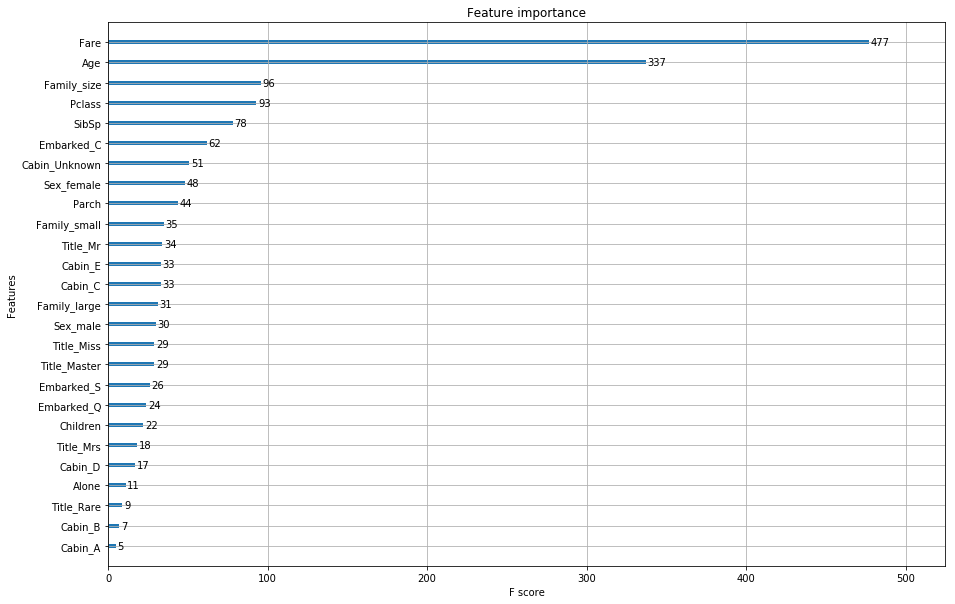

In [36]:
fig, ax = plt.subplots(figsize=[15,10])
xgb.plot_importance(xgb_model, ax=ax)
plt.show()

In [37]:
fig, ax = plt.subplots(figsize=[200,150])
xgb.plot_tree(xgb_model, num_trees=3, ax=ax)
plt.show()

The figures above show an example of a tree and its feature importance of XGBoost. We can see that Fare, Age, Family_size and Sex play importance roles in this prediction. For further improvement, we can use a technique call "target encoding" which encode the target feature to categirial variables or use ensemble learning could also help. 